# Introducción: Situación Problemática Ficticia

## Contexto:

### Una cadena de fiambrerías llamada "Delicias de la Casa" ha estado operando durante varios años y ha acumulado una cantidad significativa de datos sobre sus ventas. Recientemente, la dirección de la empresa ha decidido analizar estos datos para mejorar su estrategia de ventas y optimizar sus operaciones. 

## Problema:

### La empresa ha proporcionado dos conjuntos de datos históricos: uno con detalles de las ventas (Ventas_Detalladas) y otro con información sobre los medios de pago utilizados (Ventas_MediosPago). El objetivo es extraer información valiosa que pueda ayudar a la empresa a entender mejor sus ventas y los hábitos de pago de sus clientes.




In [83]:
import pandas as pd

# Cargar los datasets desde los archivos Excel
ventas_detalladas = pd.read_excel('Ventas_Detalladas.xls')
medios_pago = pd.read_excel('Ventas_MediosPago.xls')

ventas_detalladas

,FechaPedido,NroPedido,TipoComprobante,Letra,NroComprobante,FechaComprobante,CodCliente,NombreCliente,Total,CodArticulo,...,PorcRecargoGral,ImporteRecargoGral,PendEntrega,Sucursal,CodVendedor,NombreVendedor,Rubro,Subrubro,Marca,Proveedor
0,2021-01-15 09:06:25.010,192026,T,NaN,0,2021-01-15 09:06:25.010,109,CONSUMIDOR FINAL,102.11,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
1,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,204019,...,0,0.0,0,1,1,Mostrador,Quesos,Cremosos ...,NaN,LOGISTICA LA SERENISIMA SA Amendulari
2,2021-01-15 09:56:25.420,192034,T,B,1300363130,2021-01-15 09:56:25.420,109,CONSUMIDOR FINAL,705.37,551,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
3,2021-01-15 18:06:43.640,192076,T,B,1300363153,2021-01-15 18:06:43.640,109,CONSUMIDOR FINAL,172.11,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
4,2021-01-02 19:11:00.240,190865,T,B,1300362127,2021-01-02 19:11:00.240,109,CONSUMIDOR FINAL,1733.18,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30524,2021-01-12 10:55:13.300,20303486,T,B,1100198214,2021-01-12 10:55:13.300,109,CONSUMIDOR FINAL,447.84,207020,...,0,0.0,0,2,1,Mostrador,Quesos,Barra ...,NaN,MOLFINO HERMANOS S.A.
30525,2021-01-12 12:15:26.650,20303505,T,B,1100198233,2021-01-12 12:15:26.650,109,CONSUMIDOR FINAL,357.40,207020,...,0,0.0,0,2,1,Mostrador,Quesos,Barra ...,NaN,MOLFINO HERMANOS S.A.
30526,2021-01-11 21:04:08.120,20303461,T,B,1100198189,2021-01-11 21:04:08.120,109,CONSUMIDOR FINAL,659.92,207020,...,0,0.0,0,2,1,Mostrador,Quesos,Barra ...,NaN,MOLFINO HERMANOS S.A.
30527,2021-01-12 10:26:19.310,20303481,T,B,1100198209,2021-01-12 10:26:19.310,109,CONSUMIDOR FINAL,3987.58,207020,...,0,0.0,0,2,1,Mostrador,Quesos,Barra ...,NaN,MOLFINO HERMANOS S.A.


In [84]:
# Convertir las columnas de fechas al formato adecuado
date_format = '%Y-%m-%d %H:%M:%S.%f'
ventas_detalladas['FechaPedido'] = pd.to_datetime(ventas_detalladas['FechaPedido'], format=date_format)
ventas_detalladas['FechaComprobante'] = pd.to_datetime(ventas_detalladas['FechaComprobante'], format=date_format)
medios_pago['FechaPedido'] = pd.to_datetime(medios_pago['FechaPedido'], format=date_format)
medios_pago['FechaComprobante'] = pd.to_datetime(medios_pago['FechaComprobante'], format=date_format)
ventas_detalladas.head()

,FechaPedido,NroPedido,TipoComprobante,Letra,NroComprobante,FechaComprobante,CodCliente,NombreCliente,Total,CodArticulo,...,PorcRecargoGral,ImporteRecargoGral,PendEntrega,Sucursal,CodVendedor,NombreVendedor,Rubro,Subrubro,Marca,Proveedor
0,2021-01-15 09:06:25.010,192026,T,NaN,0,2021-01-15 09:06:25.010,109,CONSUMIDOR FINAL,102.11,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
1,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,204019,...,0,0.0,0,1,1,Mostrador,Quesos,Cremosos ...,NaN,LOGISTICA LA SERENISIMA SA Amendulari
2,2021-01-15 09:56:25.420,192034,T,B,1300363130,2021-01-15 09:56:25.420,109,CONSUMIDOR FINAL,705.37,551,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
3,2021-01-15 18:06:43.640,192076,T,B,1300363153,2021-01-15 18:06:43.640,109,CONSUMIDOR FINAL,172.11,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI
4,2021-01-02 19:11:00.240,190865,T,B,1300362127,2021-01-02 19:11:00.240,109,CONSUMIDOR FINAL,1733.18,550,...,0,0.0,0,1,1,Mostrador,Panificados,Pre Pizza ...,NaN,HUGO ENRIQUE BURLLI


In [85]:
print(ventas_detalladas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30529 entries, 0 to 30528
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FechaPedido          30529 non-null  datetime64[ns]
 1   NroPedido            30529 non-null  int64         
 2   TipoComprobante      30529 non-null  object        
 3   Letra                24413 non-null  object        
 4   NroComprobante       30529 non-null  int64         
 5   FechaComprobante     30529 non-null  datetime64[ns]
 6   CodCliente           30529 non-null  int64         
 7   NombreCliente        30529 non-null  object        
 8   Total                30529 non-null  float64       
 9   CodArticulo          30529 non-null  int64         
 10  DescripcionArticulo  30529 non-null  object        
 11  PrecioUnit           30529 non-null  float64       
 12  Cantidad             30529 non-null  float64       
 13  ImporteFinal         30529 non-

In [86]:
# Eliminar filas con datos faltantes en la columna NroComprobante
ventas_detalladas.dropna(subset=['Proveedor'], inplace=True)
ventas_detalladas.dropna(subset=['Letra'], inplace=True)

# Reemplazar valores faltantes en la columna Marca con "Marca Genérica"
ventas_detalladas['Marca'].fillna('Marca Genérica', inplace=True)
# Reemplazar valores faltantes en la columna Marca con "Marca Genérica"
ventas_detalladas['Rubro'].fillna('Rubro Genérico', inplace=True)
ventas_detalladas['Subrubro'].fillna('Subrubro Genérico', inplace=True)


print(ventas_detalladas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24408 entries, 1 to 30528
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FechaPedido          24408 non-null  datetime64[ns]
 1   NroPedido            24408 non-null  int64         
 2   TipoComprobante      24408 non-null  object        
 3   Letra                24408 non-null  object        
 4   NroComprobante       24408 non-null  int64         
 5   FechaComprobante     24408 non-null  datetime64[ns]
 6   CodCliente           24408 non-null  int64         
 7   NombreCliente        24408 non-null  object        
 8   Total                24408 non-null  float64       
 9   CodArticulo          24408 non-null  int64         
 10  DescripcionArticulo  24408 non-null  object        
 11  PrecioUnit           24408 non-null  float64       
 12  Cantidad             24408 non-null  float64       
 13  ImporteFinal         24408 non-null 

In [87]:
print(medios_pago.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   FechaPedido            7141 non-null   datetime64[ns]
 1   NroPedido              7141 non-null   int64         
 2   TipoComprobante        7141 non-null   object        
 3   Letra                  5160 non-null   object        
 4   NroComprobante         7141 non-null   int64         
 5   FechaComprobante       7141 non-null   datetime64[ns]
 6   CodCliente             7141 non-null   int64         
 7   NombreCliente          7141 non-null   object        
 8   Total                  7141 non-null   float64       
 9   Sucursal               7141 non-null   int64         
 10  NroPedido_Transaccion  7141 non-null   int64         
 11  IDPago                 7141 non-null   int64         
 12  MediodePago            7141 non-null   object        
 13  Mon

In [115]:

# Combinar los datasets utilizando las columnas FechaPedido y NroPedido
ventas_completas = pd.merge(ventas_detalladas, medios_pago, on=['FechaPedido', 'NroPedido'], suffixes=('_detallada', '_medio_pago'))



In [117]:
# Exploración inicial del dataset combinado
ventas_completas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25006 entries, 0 to 25005
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FechaPedido                  25006 non-null  datetime64[ns]
 1   NroPedido                    25006 non-null  int64         
 2   TipoComprobante_detallada    25006 non-null  object        
 3   Letra_detallada              25006 non-null  object        
 4   NroComprobante_detallada     25006 non-null  int64         
 5   FechaComprobante_detallada   25006 non-null  datetime64[ns]
 6   CodCliente_detallada         25006 non-null  int64         
 7   NombreCliente_detallada      25006 non-null  object        
 8   Total_detallada              25006 non-null  float64       
 9   CodArticulo                  25006 non-null  int64         
 10  DescripcionArticulo          25006 non-null  object        
 11  PrecioUnit                   25006 non-nu

In [119]:
ventas_completas.head()

,FechaPedido,NroPedido,TipoComprobante_detallada,Letra_detallada,NroComprobante_detallada,FechaComprobante_detallada,CodCliente_detallada,NombreCliente_detallada,Total_detallada,CodArticulo,...,NroComprobante_medio_pago,FechaComprobante_medio_pago,CodCliente_medio_pago,NombreCliente_medio_pago,Total_medio_pago,Sucursal_medio_pago,NroPedido_Transaccion,IDPago,MediodePago,MontoPago
0,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,204019,...,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,1,192152,1,Efectivo,1353.86
1,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,206016,...,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,1,192152,1,Efectivo,1353.86
2,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,200051,...,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,1,192152,1,Efectivo,1353.86
3,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,7793461000124,...,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,1,192152,1,Efectivo,1353.86
4,2021-01-16 10:05:09.140,192152,T,B,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,7792900000428,...,1300363195,2021-01-16 10:05:09.140,109,CONSUMIDOR FINAL,1353.86,1,192152,1,Efectivo,1353.86


In [121]:
# Distribución de medios de pago
medios_pago_distribucion = ventas_completas['MediodePago'].value_counts()
print(medios_pago_distribucion)

MediodePago
Efectivo                      9596
Tarjeta Debito Maestro        6839
Tarjeta Debito Visa           3296
Tarjeta TUYA                  1779
Tarjeta Credito Visa          1118
Debito Mastercard              985
Tarjeta Naranja                593
Tarjeta Credito Mastercard     427
Cuenta Corriente               172
Tarjeta Credito Cabal          111
Tarjeta Debito Cabal            59
Nota de Credito                 31
Name: count, dtype: int64


In [131]:
#Ingresos por Tienda
#Compararemos las ventas entre diferentes sucursales.
# Ingresos por tienda
ventas_por_sucursal = ventas_detalladas.groupby('Sucursal')['Total'].sum().sort_values(ascending=False)

print(ventas_por_sucursal)

Sucursal
2    2.228976e+07
1    1.307699e+07
Name: Total, dtype: float64


In [125]:
# Ventas totales por mes
ventas_completas['Mes'] = ventas_completas['FechaPedido'].dt.to_period('M')
ventas_por_mes = ventas_completas.groupby('Mes')['Total_detallada'].sum()

print(ventas_por_mes)

Mes
2021-01    3.667796e+07
Freq: M, Name: Total_detallada, dtype: float64


In [137]:
# Ingresos por sucursal
ventas_por_sucursal = ventas_completas.groupby('Sucursal_medio_pago')['Total_medio_pago'].sum().sort_values(ascending=False)

print(ventas_por_sucursal)

Sucursal_medio_pago
2    2.314342e+07
1    1.353454e+07
Name: Total_medio_pago, dtype: float64


In [147]:
#Artículos Más Vendidos
#Identificaremos los productos con mayor cantidad de ventas.
articulos_mas_vendidos = ventas_detalladas.groupby('DescripcionArticulo')['Cantidad'].sum().sort_values(ascending=False)
print(articulos_mas_vendidos.head(10))

DescripcionArticulo
Yerba < Litoral > 50 x 3 gs Ensobrados      1766.000
Q.Rallado< Paulina > -40 Gr-                 670.000
Cremoso< Paulina > -x kg-                    647.523
Barra < DQ > x kg-                           362.384
Pan< Primera > -Miga blanco 10 Fetas         356.000
Oblea< Arcor > Turron de mani                328.000
T.Empanadas< Pamp > P/ Criolla               322.000
Barra < Paulina> Danbo kg- LS                318.182
Leche< LS > -Liviana 1000 CL Sachet Ent      318.000
Cremoso< Santa Maria > -x kg-                317.918
Name: Cantidad, dtype: float64


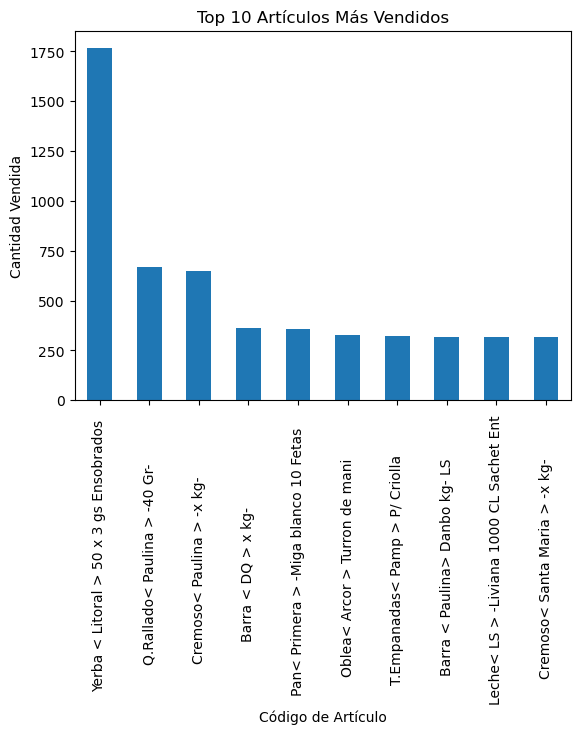

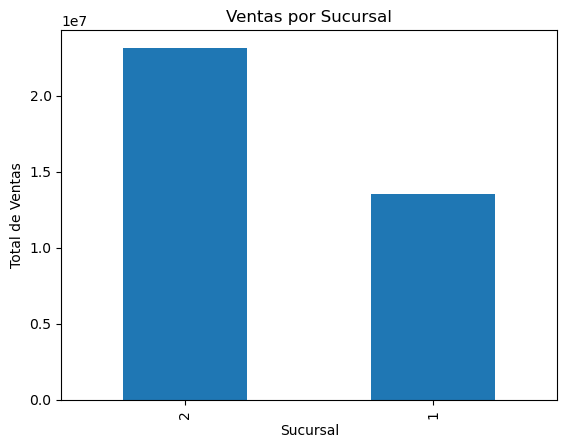

In [149]:
#Visualización de Datos
#Crearemos gráficos y visualizaciones para comunicar los hallazgos.
import matplotlib.pyplot as plt


# Gráfica de artículos más vendidos
articulos_mas_vendidos.head(10).plot(kind='bar')
plt.title('Top 10 Artículos Más Vendidos')
plt.xlabel('Código de Artículo')
plt.ylabel('Cantidad Vendida')
plt.show()

# Gráfica de ventas por sucursal
ventas_por_sucursal.plot(kind='bar')
plt.title('Ventas por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Total de Ventas')
plt.show()


MediodePago
Efectivo                      9596
Tarjeta Debito Maestro        6839
Tarjeta Debito Visa           3296
Tarjeta TUYA                  1779
Tarjeta Credito Visa          1118
Debito Mastercard              985
Tarjeta Naranja                593
Tarjeta Credito Mastercard     427
Cuenta Corriente               172
Tarjeta Credito Cabal          111
Tarjeta Debito Cabal            59
Nota de Credito                 31
Name: count, dtype: int64


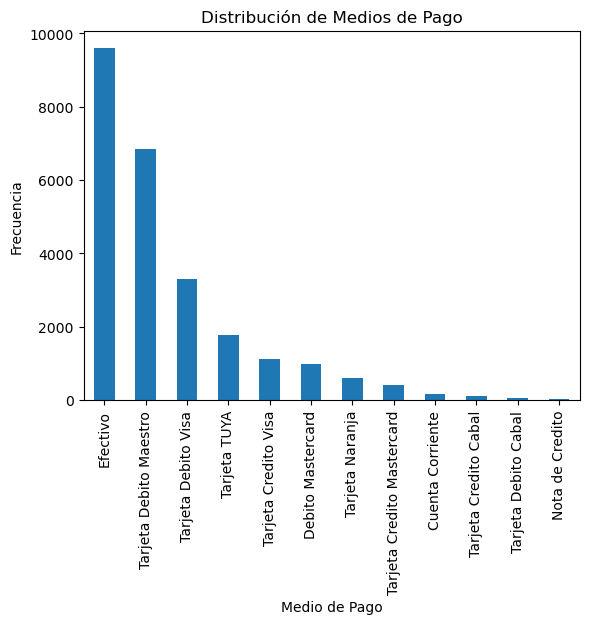

In [151]:
#Distribución de Medios de Pago
#Analizaremos la distribución de los métodos de pago utilizados.
# Distribución de medios de pago
medios_pago_distribucion = ventas_completas['MediodePago'].value_counts()
print(medios_pago_distribucion)

# Gráfica de la distribución de medios de pago
import matplotlib.pyplot as plt

medios_pago_distribucion.plot(kind='bar')
plt.title('Distribución de Medios de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Frecuencia')
plt.show()


Sucursal_detallada
2    2.314342e+07
1    1.353454e+07
Name: Total_detallada, dtype: float64


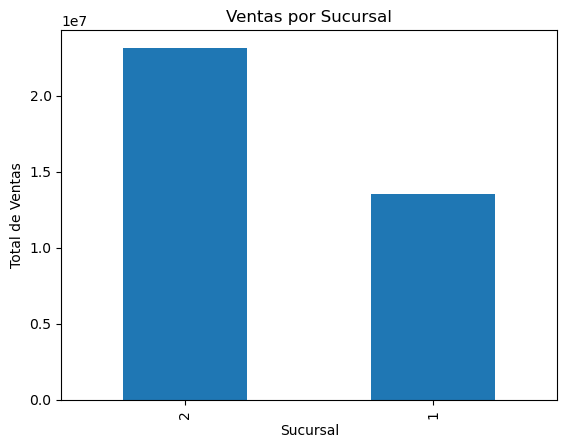

In [153]:
#Ingresos por Sucursal
#Compararemos las ventas entre diferentes sucursales.
# Ingresos por sucursal
ventas_por_sucursal = ventas_completas.groupby('Sucursal_detallada')['Total_detallada'].sum().sort_values(ascending=False)
print(ventas_por_sucursal)

# Gráfica de ventas por sucursal
ventas_por_sucursal.plot(kind='bar')
plt.title('Ventas por Sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Total de Ventas')
plt.show()
